# EDA W&Retail Cost vs Features such as Oil and Exchange Rate

South frican Petrol Price is compromised of 4 main elements                                             
                    ** 1. General Fuel Levy                                                             
                    ** 2. RAF Levy                                                                      
                    ** 3. BFP(freight and insurance cost, cargo dues, storage and financing)                                                 
                    ** 4. Wholesale and retail margien, and distribution and transport cost as WSale_Retail Cost

#### 1. Load & Understand our data

In [1]:
import pandas as pd 

df = pd.read_excel('Data Collection\Petrol.xlsx', sheet_name='Combinedv2')

df1 = pd.read_excel('Data Collection\BFP.xlsx', sheet_name='Combined')
df1['Crude_Rands'] = (df1.Avg_Brent_Crude * df1.Ex_Rate)

#New dataset with new columns
to_drop = df[['BFP ', 'Fuel tax', 'Road accident fund']]
data = df.drop(to_drop, axis=1)
#Create a new column of Crude Oil Price in Rands
data.head()

,Date,Customs &excise,Equalization fund levy,Transport cost,Petroeum Products Levy,Wholesale margin,Retail margin,Slate levy,Delivery cost,DSML,Incremental Inland Transport Recovery Cost,Secondary Storage,Secondary distribution,Petrol
0,2010-01-01,4,0,14.0,0.15,51.087,72.7,0.0,10.8,10.0,3.0,NaN,NaN,786.0
1,2010-02-01,4,0,14.0,0.15,51.087,72.7,0.0,10.8,10.0,3.0,NaN,NaN,804.0
2,2010-03-01,4,0,14.0,0.15,51.087,72.7,0.0,10.8,10.0,3.0,NaN,NaN,810.3
3,2010-04-01,4,0,14.0,0.15,51.087,72.7,0.0,10.8,10.0,3.0,NaN,NaN,858.3
4,2010-05-01,4,0,15.5,0.15,51.087,72.7,0.0,10.8,10.0,3.0,NaN,NaN,871.8


In [2]:
data['Other_cost']=data.iloc[:,2:13].sum(axis=1)
data_other = data['Other_cost']
data_other.head()

0    161.737
1    161.737
2    161.737
3    161.737
4    163.237
Name: Other_cost, dtype: float64

In [3]:
all_df = [df1, to_drop, data_other]
dataset = pd.concat(all_df, axis=1)
dataset = dataset.drop(['BFP '], axis=1)
dataset.head()

,Date,BFP,Ex_Rate,Avg_Brent_Crude,Petrol,Crude_Rands,Fuel tax,Road accident fund,Other_cost
0,2010-01-01,406.263,7.5246,74.31,786.0,559.153026,150.0,64,161.737
1,2010-02-01,424.263,7.4735,76.84,804.0,574.263740,150.0,64,161.737
2,2010-03-01,430.563,7.6902,73.17,810.3,562.691934,150.0,64,161.737
3,2010-04-01,453.063,7.4753,78.89,858.3,589.726417,167.5,72,161.737
4,2010-05-01,465.063,7.3749,85.75,871.8,632.397675,167.5,72,163.237


In [4]:
dataset.shape

(147, 9)

In [5]:
dataset.describe()

,BFP,Ex_Rate,Avg_Brent_Crude,Petrol,Crude_Rands,Fuel tax,Road accident fund,Other_cost
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,640.008156,11.940469,75.918231,1335.749912,843.021648,272.530612,142.285714,277.082823
std,137.463177,3.130337,26.278941,276.116053,205.333792,78.398508,52.243109,71.047662
min,274.770000,6.770100,18.990000,786.000000,350.880129,150.000000,64.000000,161.737000
25%,549.820000,8.794050,54.985000,1195.700000,665.399415,197.500000,88.000000,230.280000
50%,620.870000,12.860900,72.510000,1329.700000,842.732274,255.000000,154.000000,262.730000
75%,727.120000,14.463200,102.730000,1491.553500,971.138913,337.000000,193.000000,336.030000
max,1100.270000,18.477100,126.390000,2159.500000,1469.238100,393.000000,218.000000,444.230000


In [6]:
dataset.columns

Index(['Date', 'BFP', 'Ex_Rate', 'Avg_Brent_Crude', 'Petrol', 'Crude_Rands',
       'Fuel tax', 'Road accident fund', 'Other_cost'],
      dtype='object')

#### 2. Cleaning the data

Check for any null values or missing values

In [7]:
dataset.isnull().sum()

Date                  0
BFP                   0
Ex_Rate               0
Avg_Brent_Crude       0
Petrol                0
Crude_Rands           0
Fuel tax              0
Road accident fund    0
Other_cost            0
dtype: int64

Check for duplicates, and if any drop them

In [8]:
#returns the sum of duplicates
dataset.duplicated().sum()

0

In [9]:
#returns duplicates in dataframe form
dataset[dataset.duplicated()]

,Date,BFP,Ex_Rate,Avg_Brent_Crude,Petrol,Crude_Rands,Fuel tax,Road accident fund,Other_cost


#### 3. Create the Profile Report of our data

summary using the juypter notebook : To Create the simple report quickly

In [10]:
# pip install pandas-profiling

In [ ]:
#  Lets import the library needed
#from pandas_profiling import ProfileReport 

# lets create the profiling report
#profile = ProfileReport( dataset, title = 'Pandas Profiling Report', explorative=True)

# profile.to_widgets()

#### 4. Data Visualization

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

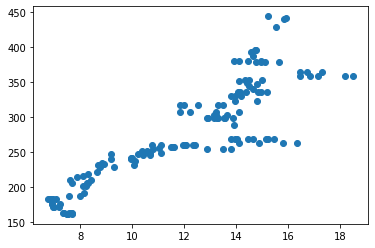

In [21]:
plt.scatter(dataset['Ex_Rate'], dataset['Other_cost'])
plt.show()

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objs as go
from plotly.offline import iplot


# chart 1
chart1 = go.Histogram(x=dataset.Oil_Rand)

# chart 2
chart2 = go.Histogram(x=dataset.Crude_Oil)

#chart 3
chart3 = go.Histogram(x=dataset.ZAR_USD)

#chart 4
chart4 = go.Histogram(x=dataset['W&Retail_Cost'])


fig = make_subplots(rows=1, cols=4, subplot_titles=("Oil Price(Rand): Main Feature", "Crude Oil : Feature A", "ZAR-USD : Feature B", 'Label : Wholesale & Retail Cost'))
fig.append_trace(chart1, 1, 1)
fig.append_trace(chart2, 1, 2)
fig.append_trace(chart3, 1, 3)
fig.append_trace(chart4, 1, 4)
fig['layout'].update(height=600, width=1000,
					title='subplot')
iplot(fig)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 4, figsize=(20,8))

#create chart in each subplot
sns.boxplot(data=dataset, y='Oil_Rand', ax=axes[0])
sns.boxplot(data=dataset, y='Crude_Oil', ax=axes[1])
sns.boxplot(data=dataset, y='ZAR_USD', ax=axes[2])
sns.boxplot(data=dataset, y='W&Retail_Cost', ax=axes[3])

In [ ]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 4, figsize=(20,8))

#create chart in each subplot
sns.histplot(data=dataset, y='Oil_Rand', ax=axes[0])
sns.histplot(data=dataset, y='Crude_Oil', ax=axes[1])
sns.histplot(data=dataset, y='ZAR_USD', ax=axes[2])
sns.histplot(data=dataset, y='W&Retail_Cost', ax=axes[3])

Graph Compilation

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(2, 4, figsize=(20,10))

#create chart in each subplot in row 1
sns.boxplot(data=dataset, y='Oil_Rand', ax=axes[0,0])
sns.boxplot(data=dataset, y='Crude_Oil', ax=axes[0,1])
sns.boxplot(data=dataset, y='ZAR_USD', ax=axes[0,2])
sns.boxplot(data=dataset, y='W&Retail_Cost', ax=axes[0,3])


#create chart in each subplot in row 2
sns.histplot(data=dataset, y='Oil_Rand', ax=axes[1,0])
sns.histplot(data=dataset, y='Crude_Oil', ax=axes[1,1])
sns.histplot(data=dataset, y='ZAR_USD', ax=axes[1,2])
sns.histplot(data=dataset, y='W&Retail_Cost', ax=axes[1,3])


#Create another graph for the distribution

cols = ['Oil_Rand', 'Crude_Oil', 'ZAR_USD', 'W&Retail_Cost']

# create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(13,6))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=dataset[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()


In [ ]:
# select the columns to be plotted
cols = ['Oil_Rand', 'Crude_Oil', 'ZAR_USD', 'W&Retail_Cost']

# create the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(20,6))
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cols, axes):
    sns.histplot(data=dataset[col], kde=True, stat='density', ax=ax)

fig.tight_layout()
plt.show()


In [ ]:
#define dimensions of subplots (rows, columns)
fig, axes = plt.subplots(1, 3, figsize=(15,8))

#create chart in each subplot
sns.scatterplot(data=dataset, x='Oil_Rand',y='W&Retail_Cost', ax=axes[0])
axes[0].set_title('Oil Price(Rand) vs Wholesale & Retail Cost')


sns.scatterplot(data=dataset, x='Crude_Oil', y='W&Retail_Cost', ax=axes[1])
axes[1].set_title('Crude Oil (USD) vs Wholesale & Retail Cost')

sns.scatterplot(data=dataset, x='ZAR_USD', y='W&Retail_Cost', ax=axes[2])
axes[3].set_title('ZAR_USD vs Wholesale & Retail Cost')

#### 5. Descriptive statistics and data distribution

In [ ]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (12,6))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


In [ ]:
# Graph of Oil in Rands
col = dataset['Oil_Rand']
# Call the function
show_distribution(col)

#Graph of Crude Oil in USD
colB = dataset['Crude_Oil']
# Call the function
show_distribution(colB)

#Graph of Exchange Rate
colC = dataset['ZAR_USD']
# Call the function
show_distribution(colC)

#Graph of Wholesale & Retail cost
colD = dataset['W&Retail_Cost']
# Call the function
show_distribution(colD)

In [ ]:
def show_density(var_data):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

In [ ]:
# Get the density of Grade
col = dataset['Oil_Rand']
col1 = dataset['Crude_Oil']
col2 = dataset['ZAR_USD']
col3 = dataset['W&Retail_Cost']
show_density(col)
show_density(col1)
show_density(col2)
show_density(col3)

#### 6. Relationship Analysis : Corrolation

In [ ]:
# Show a graph of the result

sns.jointplot(data = dataset, x="Oil_Rand", y="W&Retail_Cost", kind="reg", ax=axes[0])

sns.jointplot(data = dataset, x="Crude_Oil", y="W&Retail_Cost", kind="reg", ax=axes[1])

sns.jointplot(data = dataset, x="ZAR_USD", y="W&Retail_Cost", kind="reg", ax=axes[2])


In [ ]:
import plotly.express as px

fig = px.scatter_3d(dataset, x='Crude_Oil', y='ZAR_USD', z='W&Retail_Cost', color='W&Retail_Cost')
fig.show()

<AxesSubplot:>

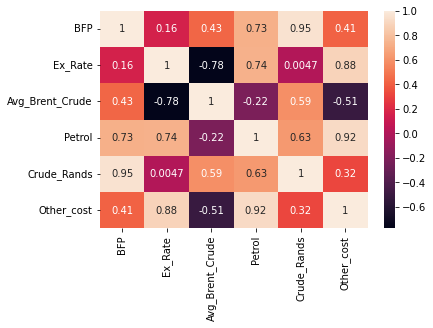

In [15]:
# Check the corelation between the selected features and the label
df2 = dataset[['BFP','Ex_Rate' ,'Avg_Brent_Crude', 'Petrol', 'Crude_Rands', 'Other_cost']]

corelation = df2.corr()
#Create the graph
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns, annot=True)

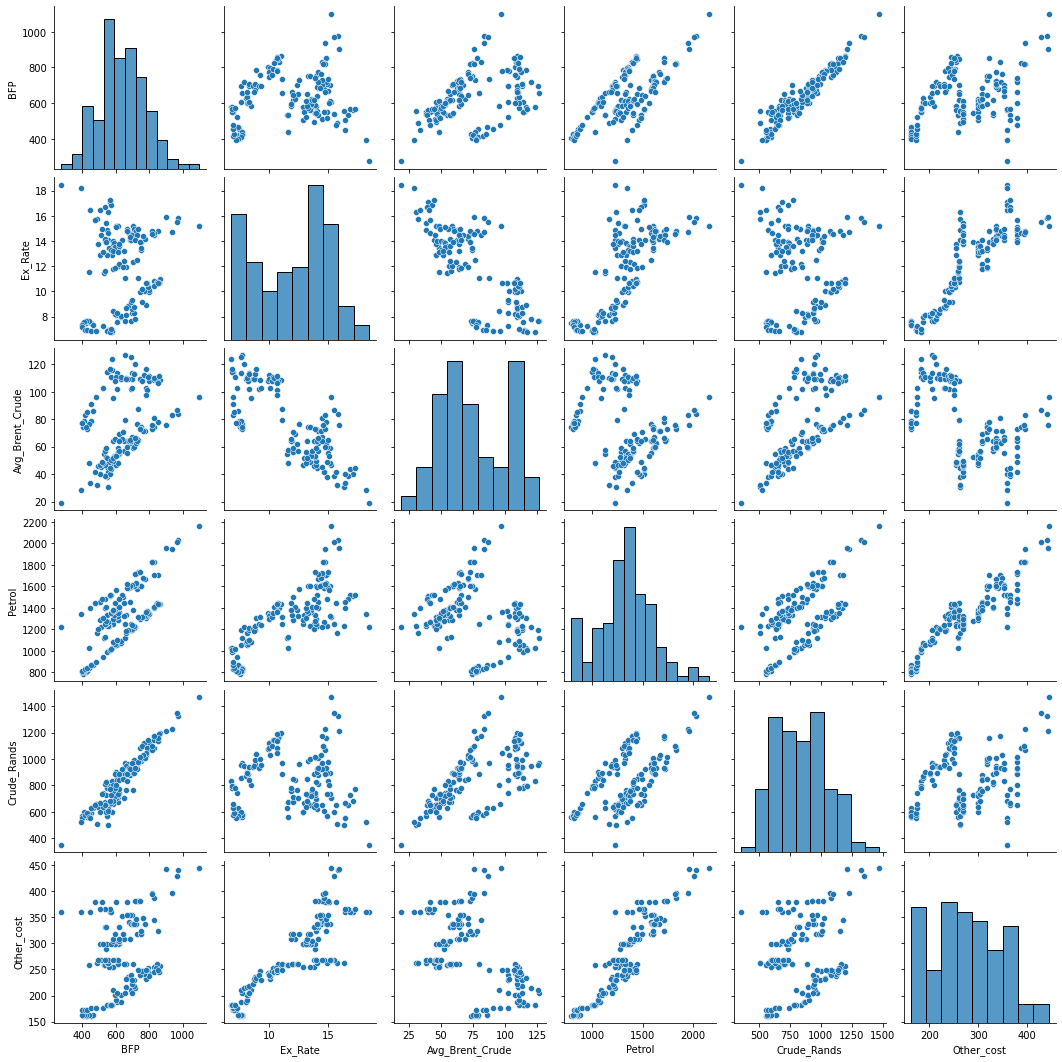

In [16]:
sns.pairplot(df2)

#### 6b. Wholesale & Retail Cost vs ZAR_USD

Its easy to see that the Wholesale & Retail Cost and Exchange Rate are highly colerated

Lets draw a scatter plot between the two

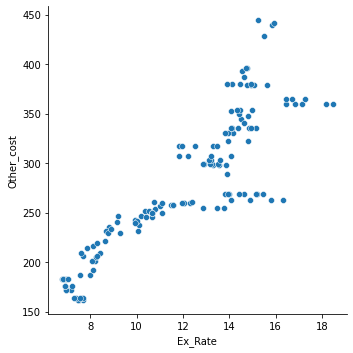

In [17]:
sns.relplot(data = df2 ,x= 'Ex_Rate', y='Other_cost')

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Other_cost', ylabel='Density'>

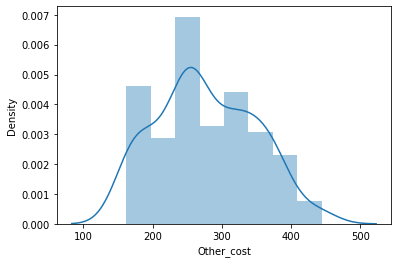

In [19]:
sns.distplot(df2['Other_cost'])

In [20]:
import plotly.express as px

#Show a graph of the result
px.scatter(dataset, x='Ex_Rate', y='Other_cost', trendline='ols', trendline_color_override='red')


#### Simple linear Regression

In [29]:
import statsmodels.formula.api as smf
# First, we define our formula using a special syntax
# This says BFP is explained by Oil_Rand
formula = "BFP ~ Crude_Rands"

# Perform linear regression. This method takes care of
# the entire fitting procedure for us.
model = smf.ols(formula = formula, data = dataset).fit()


# Lets do the same to Petrol Price
other_formula = 'Other_cost ~ Ex_Rate'
other_model = smf.ols(formula = other_formula, data = dataset).fit()

print("R-squared: BFP", model.rsquared)
print("R-squared: Other cost", other_model.rsquared)

R-squared: BFP 0.9078394437852623
R-squared: Other cost 0.7779494980452659


#### Interpreting our model

In [30]:
print("Intercept:", model.params[0], "Slope:", model.params[1])
print("Intercept:", other_model.params[0], "Slope:", other_model.params[1])

Intercept: 102.27204838363235 Slope: 0.6378674961030573
Intercept: 38.05096054357334 Slope: 20.018632000414026


In [26]:
def estimate_bfp(Crude_Rands):
    # Model param[0] is the intercepts and param[1] is the slope
    return Crude_Rands * model.params[1] + model.params[0]

print("Estimate BFP from Oil Price")
print(estimate_bfp(Crude_Rands=1469.24))

Estimate BFP from Oil Price
1039.4524883580882


In [31]:
def estimate_other_cost(Ex_Rate):
    # Model param[0] is the intercepts and param[1] is the slope
    return Ex_Rate * other_model.params[1] + other_model.params[0]

print("Estimate other cost from exchange rate")
print(estimate_other_cost(Ex_Rate=15.28))

Estimate other cost from exchange rate
343.93565750989967


#### Petrol Price prediction

In [33]:
petrol_price = 1039.45 + 343.94 + 393 + 218
print(petrol_price)

1994.39
